In [1]:
# importing libraries
import pandas as pd

# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading dataset
df = pd.read_csv('iris.data.txt', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


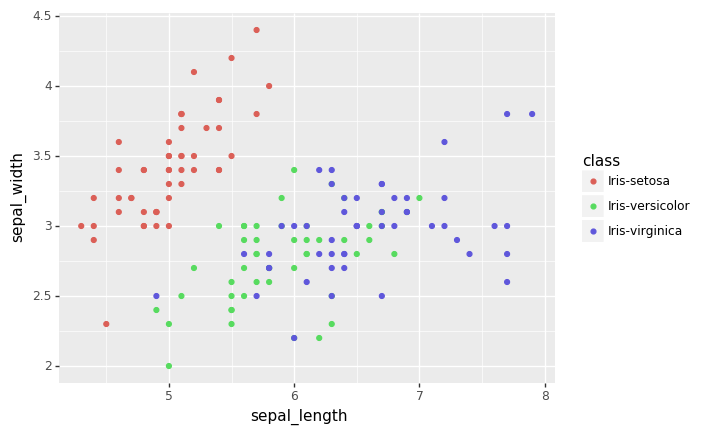

<ggplot: (120067690921)>

In [11]:
from plotnine import *

(ggplot(df)
 + aes('sepal_length', 'sepal_width')
 + aes(color='class')
 + geom_point())

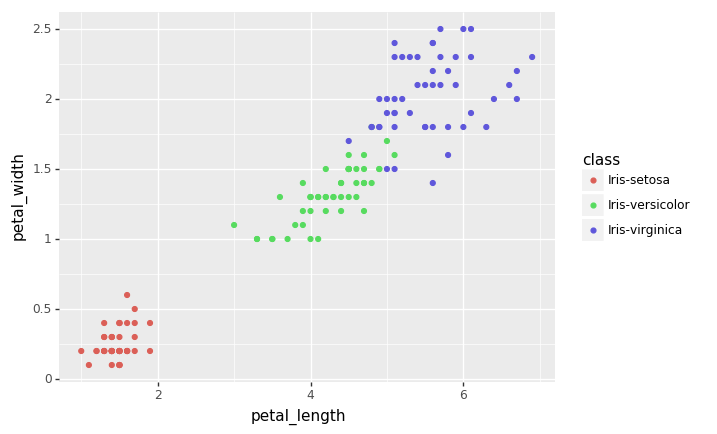

<ggplot: (-9223371916787237856)>

In [3]:
(ggplot(df)
 + aes('petal_length', 'petal_width')
 + aes(color='class')
 + geom_point())

We'll use scikit learn to train a KNN classifier and evaluate its performance on the dataset

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:4]
y = df.iloc[:,4]

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [5]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

1.0


In [6]:
# import libraries
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1,50,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 11


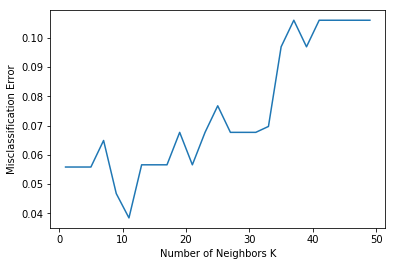

In [7]:
import matplotlib.pyplot as plt

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Writing a KNN algorithm from scratch

A machine learning algorithm usually consists of two code blocks:
    1. A training block that takes as input the training data X and the corresponding target y & outputs a learned model h.
    2. A predict block that takes as input new and unseen observations and uses the function h to output their corresponding responses.

In [18]:
# KNN is a lazy algorithm, the training block reduces to just memorizing the training data.

# import libraries
from collections import Counter


def train(X_train, y_train):
    # do nothing
    return

# Now write the predict block that essentially 
# 1. computes the eucledian distances between the new observation and all the points in the training set
# 2. Selects the k nearest ones and perform a majority vote
# 3. Assign the corresponding label to the observation
def predict(X_train, y_train, X_test, k):
    # create lists for distances and targets
    distances = []
    targets = []
    
    for i in range(len(X_train)):
        # calculate the distance between new observation and each data point in training set
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i,:])))
        # append this distance in the distances list
        distances.append([distance,i])
        
    # sort the list of distances on the value of distance
    distances = sorted(distances)
    
    # make a list of target of the top k data points in the sorted distances list (k neighbors)
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    
    # return most common target
    return Counter(targets).most_common(1)[0][0]

Putting it all together, we can define the function KNearestNeighbor, which loops over every test example and makes a prediction.

In [19]:
def KNearestNeighbors(X_train, y_train, X_test, predictions, k):
    
    # convert all data into numpy arrays
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    
    # train on the input data
    train(X_train, y_train)
    
    # loop over all new observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i,:], k))

In [21]:
# making our predictions
predictions = []

KNearestNeighbors(X_train, y_train, X_test, predictions, 20)

# transform the list into an array
predictions = np.asarray(predictions)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print('\n The accuracy of our algorithm is {}'.format(accuracy*100))


 The accuracy of our algorithm is 100.0


In [40]:
# Let's write the code again with some error handling feature built in.

def KNearestNeighbor(X_train, y_train, X_test, predictions, k):
    
    # check if k is larger than n
    if k > len(X_train):
        raise ValueError
    
    # convert all data into numpy arrays
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    
    # train on the input data
    train(X_train, y_train)
    
    # loop over all new observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i,:], k))
        

# making our predictions
predictions = []

try:
    KNearestNeighbor(X_train, y_train, X_test, predictions, 150)

    # transform the list into an array
    predictions = np.asarray(predictions)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions)
    print('\n The accuracy of our algorithm is {}'.format(accuracy*100))
    
except ValueError:
    print('Can\'t have more neighbors than training samples!!')


Can't have more neighbors than training samples!!
